# Importing Libraries

In [94]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data from csv file

In [95]:
data = pd.read_csv('starbucks_drinkMenu_expanded.csv', encoding="ISO-8859-1", low_memory=False)
data

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [96]:
data.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Cleaning data

In [98]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [99]:
data = data.rename(columns={'Beverage_category': 'beverage_category', 'Beverage': 'beverage', 'Beverage_prep': 'beverage_prep', 'Calories': 'calories', ' Total Fat (g)': 'total_fat_g', ' Sodium (mg)': 'sodium_mg', ' Total Carbohydrates (g) ': 'total_carbohydrates_g', 'Cholesterol (mg)': 'cholesterol_mg', ' Dietary Fibre (g)': 'dietary_fibre_g', ' Sugars (g)': 'sugars_g', ' Protein (g) ': 'protein_g', 'Vitamin A (% DV) ': 'vitamin_A', 'Vitamin C (% DV)': 'vitamin_C', ' Calcium (% DV) ': 'calcium', 'Iron (% DV) ': 'iron', 'Caffeine (mg)': 'caffeine'})

In [100]:
data.columns

Index(['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'total_fat_g', 'Trans Fat (g) ', 'Saturated Fat (g)', 'sodium_mg',
       'total_carbohydrates_g', 'cholesterol_mg', 'dietary_fibre_g',
       'sugars_g', 'protein_g', 'vitamin_A', 'vitamin_C', 'calcium', 'iron',
       'caffeine'],
      dtype='object')

In [101]:
data.drop_duplicates(inplace = True)

In [151]:
data["vitamin_A"] = data["vitamin_A"].str.rstrip("%").astype("float") / 100
data

,beverage_category,beverage,beverage_prep,calories,total_fat_g,Trans Fat (g),Saturated Fat (g),sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,0.06,8%,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0%,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0%,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0%,10%,6%,0


In [159]:
data["vitamin_C"] = data["vitamin_C"].str.rstrip("%").astype("float") / 100
data

,beverage_category,beverage,beverage_prep,calories,total_fat_g,Trans Fat (g),Saturated Fat (g),sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0.00,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0.00,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0.00,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,0.06,0.08,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0.00,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0.00,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0.00,10%,6%,0


In [167]:
data["calcium"] = data["calcium"].str.rstrip("%").astype("float") / 100
data

,beverage_category,beverage,beverage_prep,calories,total_fat_g,Trans Fat (g),Saturated Fat (g),sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0.00,0.00,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0.00,0.00,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.00,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.02,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0.00,0.20,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,0.06,0.08,0.20,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0.00,0.10,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0.00,0.10,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0.00,0.10,6%,0


In [102]:
data.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,Trans Fat (g),Saturated Fat (g),sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [160]:
data.isnull().sum()

beverage_category        0
beverage                 0
beverage_prep            0
calories                 0
total_fat_g              0
Trans Fat (g)            0
Saturated Fat (g)        0
sodium_mg                0
total_carbohydrates_g    0
cholesterol_mg           0
dietary_fibre_g          0
sugars_g                 0
protein_g                0
vitamin_A                0
vitamin_C                0
calcium                  0
iron                     0
caffeine                 1
dtype: int64

In [161]:
req_data =  data[['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'total_fat_g', 'sodium_mg','total_carbohydrates_g', 'cholesterol_mg', 'dietary_fibre_g',
       'sugars_g', 'protein_g', 'vitamin_A', 'vitamin_C', 'calcium', 'iron',
       'caffeine']]

In [162]:
req_data

,beverage_category,beverage,beverage_prep,calories,total_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0,5,0,0,0,0.3,0.00,0.00,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0,10,0,0,0,0.5,0.00,0.00,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0,10,0,0,0,1.0,0.00,0.00,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0,10,0,0,0,1.0,0.00,0.00,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,5,75,10,0,9,6.0,0.10,0.00,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0,250,67,1,64,5.0,0.06,0.08,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0,160,39,0,38,4.0,0.06,0.00,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,10,160,39,0,38,3.0,0.06,0.00,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0,160,37,1,35,3.0,0.04,0.00,10%,6%,0


In [163]:
req_data.columns

Index(['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'total_fat_g', 'sodium_mg', 'total_carbohydrates_g', 'cholesterol_mg',
       'dietary_fibre_g', 'sugars_g', 'protein_g', 'vitamin_A', 'vitamin_C',
       'calcium', 'iron', 'caffeine'],
      dtype='object')

Getting beverage categories 

In [164]:
req_data['beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'TazoÂ® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'FrappuccinoÂ® Blended Coffee',
       'FrappuccinoÂ® Light Blended Coffee',
       'FrappuccinoÂ® Blended CrÃ¨me'], dtype=object)

In [116]:
req_data.corr()

,calories,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g
calories,1.000000,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453
sodium_mg,0.387892,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233
total_carbohydrates_g,0.795037,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629
cholesterol_mg,0.940034,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449
dietary_fibre_g,0.384292,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274
sugars_g,0.909675,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061
protein_g,0.578453,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000


In [117]:
def get_max_values_by_category(dataframe,category):
    group_result=category.groupby(dataframe.beverage).max().sort_values(ascending=False).nlargest(10)
    return group_result

Max Calories in all beverage categories

In [124]:
calories_beverages=get_max_values_by_category(req_data,req_data.calories)
calories_beverages

beverage
White Chocolate Mocha (Without Whipped Cream)    510
Java Chip (Without Whipped Cream)                460
TazoÂ® Green Tea Latte                           450
Mocha (Without Whipped Cream)                    390
Hot Chocolate (Without Whipped Cream)            380
Caramel (Without Whipped Cream)                  370
Caramel Apple Spice (Without Whipped Cream)      360
Coffee                                           350
Strawberries & CrÃ¨me (Without Whipped Cream)    350
CaffÃ¨ Mocha (Without Whipped Cream)             340
Name: calories, dtype: int64

<AxesSubplot:xlabel='calories', ylabel='beverage'>

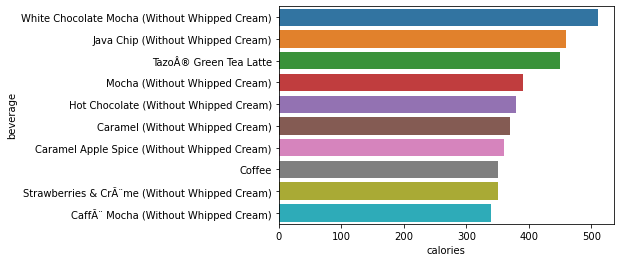

In [125]:
calories_data = {'beverage': ['White Chocolate Mocha (Without Whipped Cream)', 'Java Chip (Without Whipped Cream)','TazoÂ® Green Tea Latte','Mocha (Without Whipped Cream)','Hot Chocolate (Without Whipped Cream)','Caramel (Without Whipped Cream)','Caramel Apple Spice (Without Whipped Cream)','Coffee','Strawberries & CrÃ¨me (Without Whipped Cream)','CaffÃ¨ Mocha (Without Whipped Cream)'],'calories': [510,460,450,390,380,370,360,350,350,340]}
calories_df = pd.DataFrame(calories_data)
sns.barplot(data=calories_df, x="calories", y="beverage")

In [126]:
carb_heavy_beverages=get_max_values_by_category(req_data,req_data.total_carbohydrates_g)
carb_heavy_beverages

beverage
Java Chip (Without Whipped Cream)                340
White Chocolate Mocha (Without Whipped Cream)    330
Java Chip                                        320
Caramel (Without Whipped Cream)                  300
Coffee                                           300
Mocha (Without Whipped Cream)                    300
Mocha                                            280
Caramel                                          270
Strawberries & CrÃ¨me (Without Whipped Cream)    260
Vanilla Bean (Without Whipped Cream)             230
Name: total_carbohydrates_g, dtype: int64

In [132]:
carb_data = {'beverage': ['Java Chip (Without Whipped Cream)','White Chocolate Mocha (Without Whipped Cream)','Java Chip','Caramel (Without Whipped Cream)','Coffee','Mocha (Without Whipped Cream)','Mocha','Caramel','Strawberries & CrÃ¨me (Without Whipped Cream)','Vanilla Bean (Without Whipped Cream)'],'total_carbohydrates_g': [340,330,320,300,300,300,280,270,260,230]}
carb_df = pd.DataFrame(carb_data)
carb_df

,beverage,total_carbohydrates_g
0,Java Chip (Without Whipped Cream),340
1,White Chocolate Mocha (Without Whipped Cream),330
2,Java Chip,320
3,Caramel (Without Whipped Cream),300
4,Coffee,300
5,Mocha (Without Whipped Cream),300
6,Mocha,280
7,Caramel,270
8,Strawberries & CrÃ¨me (Without Whipped Cream),260
9,Vanilla Bean (Without Whipped Cream),230


<AxesSubplot:xlabel='total_carbohydrates_g', ylabel='beverage'>

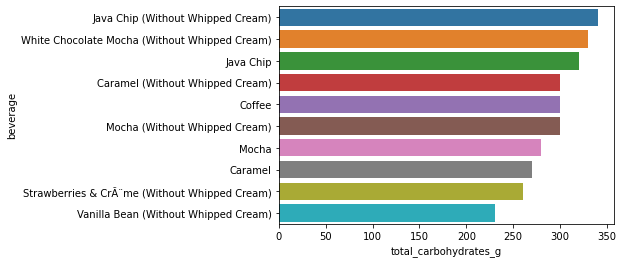

In [133]:
sns.barplot(data=carb_df, x="total_carbohydrates_g", y="beverage")

In [134]:
comb_carb_calo = {'beverage_cal': ['White Chocolate Mocha (Without Whipped Cream)', 'Java Chip (Without Whipped Cream)','TazoÂ® Green Tea Latte','Mocha (Without Whipped Cream)','Hot Chocolate (Without Whipped Cream)','Caramel (Without Whipped Cream)','Caramel Apple Spice (Without Whipped Cream)','Coffee','Strawberries & CrÃ¨me (Without Whipped Cream)','CaffÃ¨ Mocha (Without Whipped Cream)'],'calories': [510,460,450,390,380,370,360,350,350,340], 'beverage_carb': ['Java Chip (Without Whipped Cream)','White Chocolate Mocha (Without Whipped Cream)','Java Chip','Caramel (Without Whipped Cream)','Coffee','Mocha (Without Whipped Cream)','Mocha','Caramel','Strawberries & CrÃ¨me (Without Whipped Cream)','Vanilla Bean (Without Whipped Cream)'],'total_carbohydrates_g': [340,330,320,300,300,300,280,270,260,230]}
comb_carb_calo_df = pd.DataFrame(comb_carb_calo)
comb_carb_calo_df

,beverage_cal,calories,beverage_carb,total_carbohydrates_g
0,White Chocolate Mocha (Without Whipped Cream),510,Java Chip (Without Whipped Cream),340
1,Java Chip (Without Whipped Cream),460,White Chocolate Mocha (Without Whipped Cream),330
2,TazoÂ® Green Tea Latte,450,Java Chip,320
3,Mocha (Without Whipped Cream),390,Caramel (Without Whipped Cream),300
4,Hot Chocolate (Without Whipped Cream),380,Coffee,300
5,Caramel (Without Whipped Cream),370,Mocha (Without Whipped Cream),300
6,Caramel Apple Spice (Without Whipped Cream),360,Mocha,280
7,Coffee,350,Caramel,270
8,Strawberries & CrÃ¨me (Without Whipped Cream),350,Strawberries & CrÃ¨me (Without Whipped Cream),260
9,CaffÃ¨ Mocha (Without Whipped Cream),340,Vanilla Bean (Without Whipped Cream),230


Normal carb intake for one day should be between 225 and 325 grams if you eat 2000 calories according to research, which is 9:80 or 13:80 in terms of ratio. Some beverage exceeds normal ratio i.e carb intake is high in ratio with calories.

Beverage with highest calories

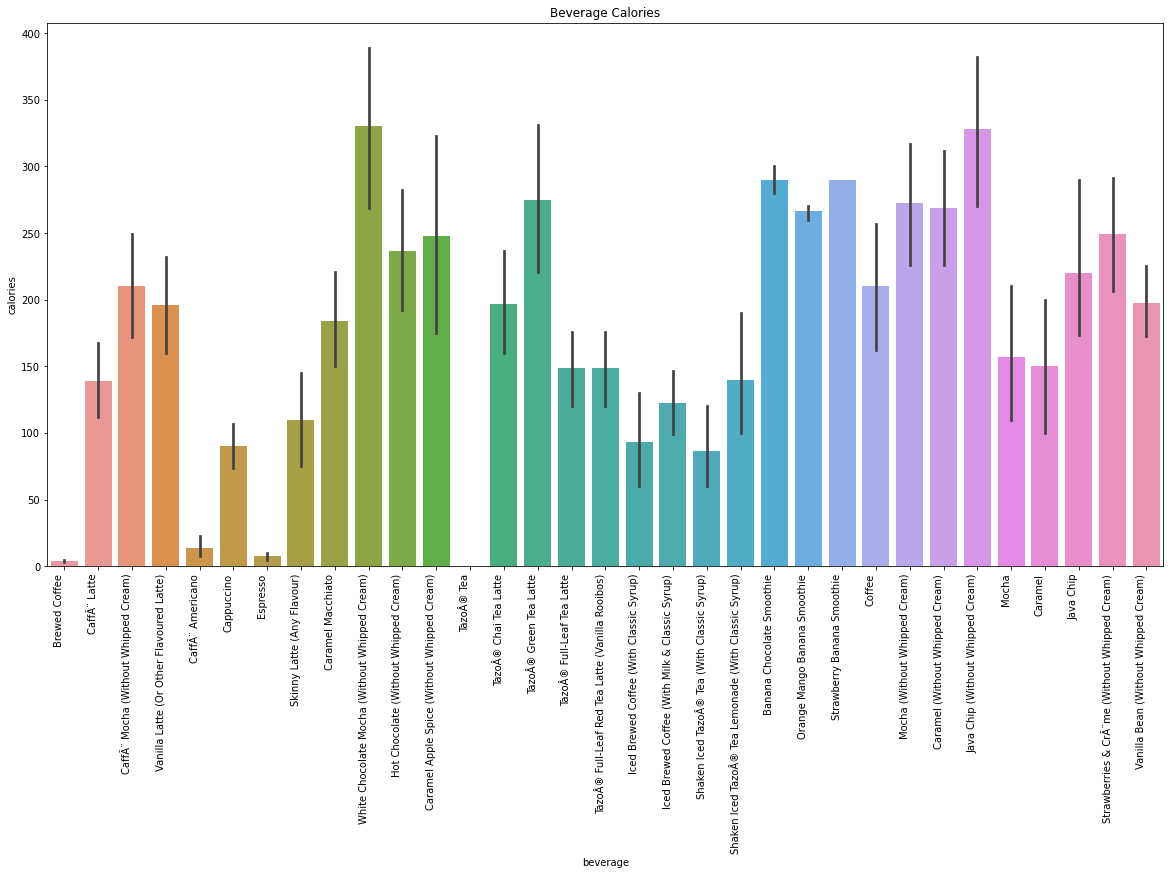

In [139]:
plt.figure(figsize=(20, 10))
sns.barplot(data=req_data, x="beverage", y="calories")
plt.xticks(rotation=90, ha='right')
plt.title("Beverage Calories")
plt.show()

In [140]:
Signature_Espresso_Drinks = req_data.loc[(req_data['beverage_category'] == 'Signature Espresso Drinks')]
Signature_Espresso_Drinks.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
62,Signature Espresso Drinks,Caramel Macchiato,Short Nonfat Milk,100,1,5,70,17,0,15,6.0,10%,0%,15%,0%,75
63,Signature Espresso Drinks,Caramel Macchiato,2% Milk,120,4,15,80,16,0,15,5.0,10%,0%,15%,0%,75
64,Signature Espresso Drinks,Caramel Macchiato,Soymilk,100,3,0,60,14,1,11,4.0,6%,0%,15%,8%,75
65,Signature Espresso Drinks,Caramel Macchiato,Tall Nonfat Milk,140,1,5,105,25,0,24,8.0,15%,0%,25%,0%,75
66,Signature Espresso Drinks,Caramel Macchiato,2% Milk,180,5,20,115,25,0,23,8.0,15%,0%,25%,0%,75


Text(0.5, 1.0, 'Starbucks Signature Espresso Drinks Calories')

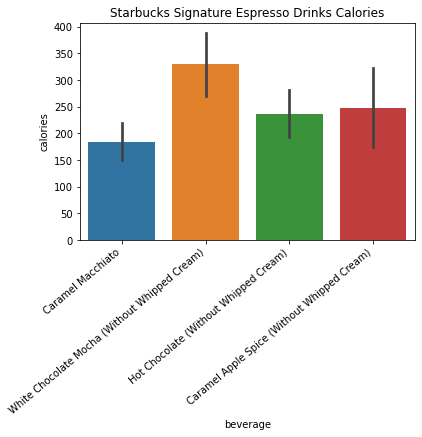

In [142]:
sns.barplot(x="beverage", y="calories", data=Signature_Espresso_Drinks)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Signature Espresso Drinks Calories")

Signature Espresso Drinks(White Chocolate Mocha) has the highest calories 

Beverage with highest sugar content

In [143]:
req_data.sort_values("sugars_g", ascending=False)

,beverage_category,beverage,beverage_prep,calories,total_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
214,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,15,340,90,2,84,7.0,6%,0%,15%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,0,330,88,3,80,6.0,6%,0%,20%,40%,145
206,FrappuccinoÂ® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,15,300,78,0,77,5.0,8%,0%,15%,2%,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Classic Espresso Drinks,Espresso,Solo,5,0,0,0,1,0,0,0.4,0%,0%,0%,0%,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0,0,1,2,0,0,1.0,0%,0%,0%,0%,150
102,TazoÂ® Tea Drinks,TazoÂ® Tea,Short,0,0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,TazoÂ® Tea Drinks,TazoÂ® Tea,Tall,0,0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


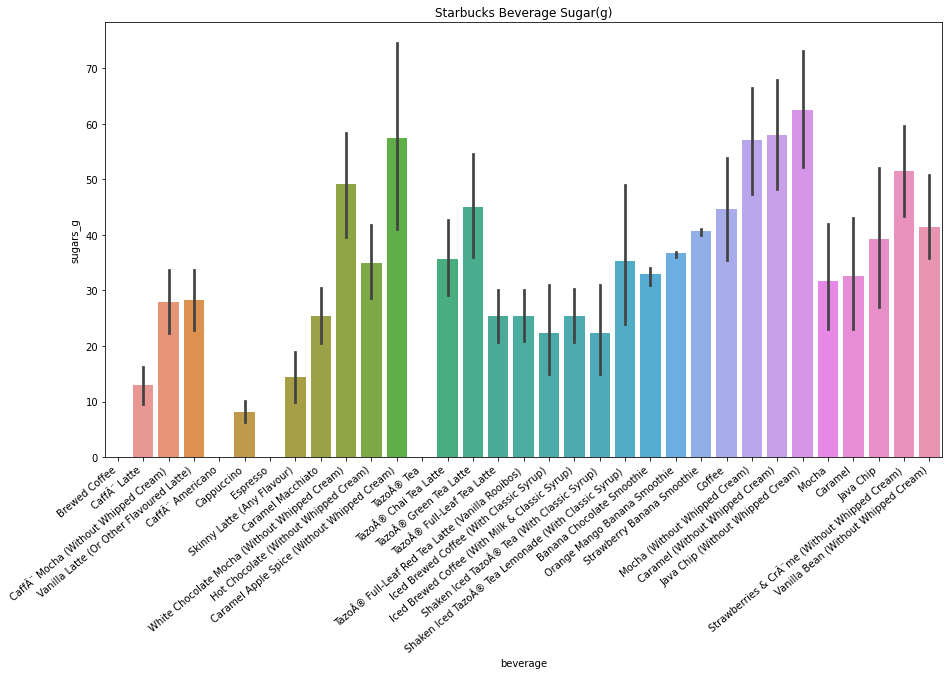

In [144]:
plt.figure(figsize=(15, 8))
sns.barplot(data=req_data, x="beverage", y="sugars_g")
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

Java Chip (Without Whipped Cream) of FrappuccinoÂ® Blended Coffee category is beverage with highest sugar content

Text(0.5, 1.0, 'Starbucks Signature Espresso Drinks sugar')

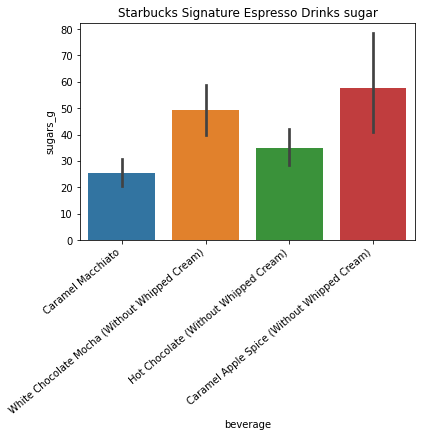

In [145]:
sns.barplot(x="beverage", y="sugars_g", data=Signature_Espresso_Drinks)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Signature Espresso Drinks sugar")

Caramel Apple Spice of category Signature Espresso Drinks is second highest with sugar content

Beverage with highest Cholesterol (mg) 

In [146]:
req_data.sort_values("cholesterol_mg", ascending=False)

,beverage_category,beverage,beverage_prep,calories,total_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_A,vitamin_C,calcium,iron,caffeine
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,15,340,90,2,84,7.0,6%,0%,15%,35%,145
214,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,5,340,90,2,84,7.0,10%,0%,20%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,0,330,88,3,80,6.0,6%,0%,20%,40%,145
196,FrappuccinoÂ® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,5,300,80,1,76,7.0,10%,0%,15%,10%,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Coffee,Brewed Coffee,Tall,4,0.1,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0,10,0,0,0,1.0,0%,0%,2%,0%,410
105,TazoÂ® Tea Drinks,TazoÂ® Tea,Venti,0,0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


FrappuccinoÂ® Blended Coffee Java Chip (Without Whipped Cream) has highest Cholesterol

Correlations

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


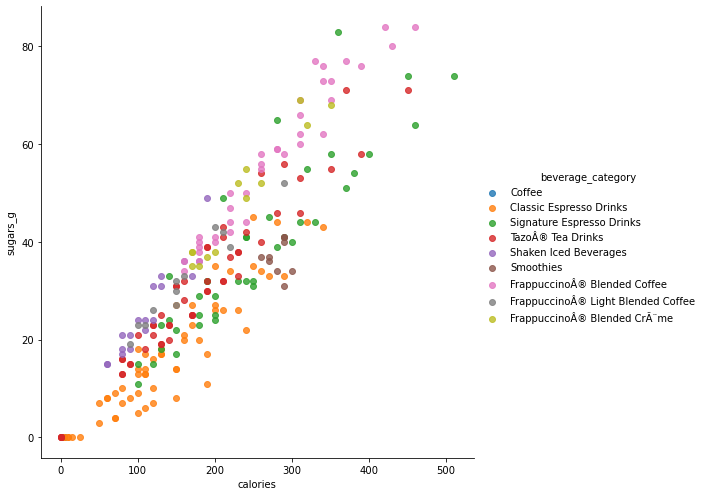

In [147]:
Cal_Sug_corr = sns.lmplot(data = req_data, x='calories', y='sugars_g', fit_reg = False, hue = 'beverage_category', size = 7, aspect = 1)

There is a correlation in calories and sugar 

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


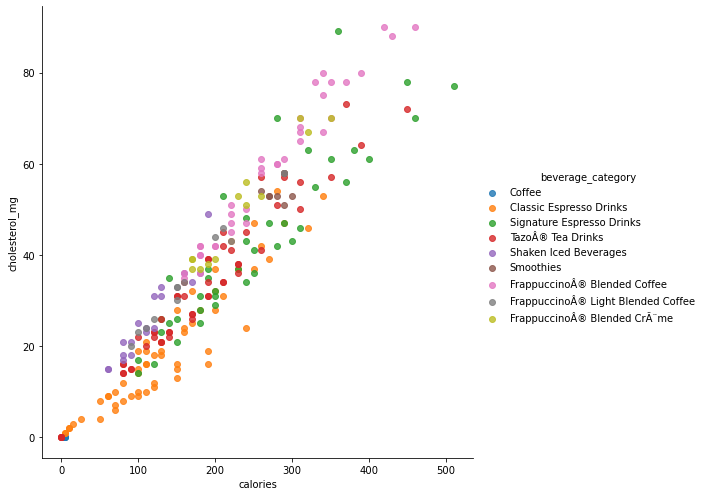

In [155]:
Cal_choles_corr = sns.lmplot(data = req_data, x='calories', y= 'cholesterol_mg', fit_reg = False, hue = 'beverage_category', size = 7, aspect = 1)

There is a correlation between calories and cholestrol.

Vitamin A in beverages

Text(0.5, 1.0, 'Vitamin A in beverages')

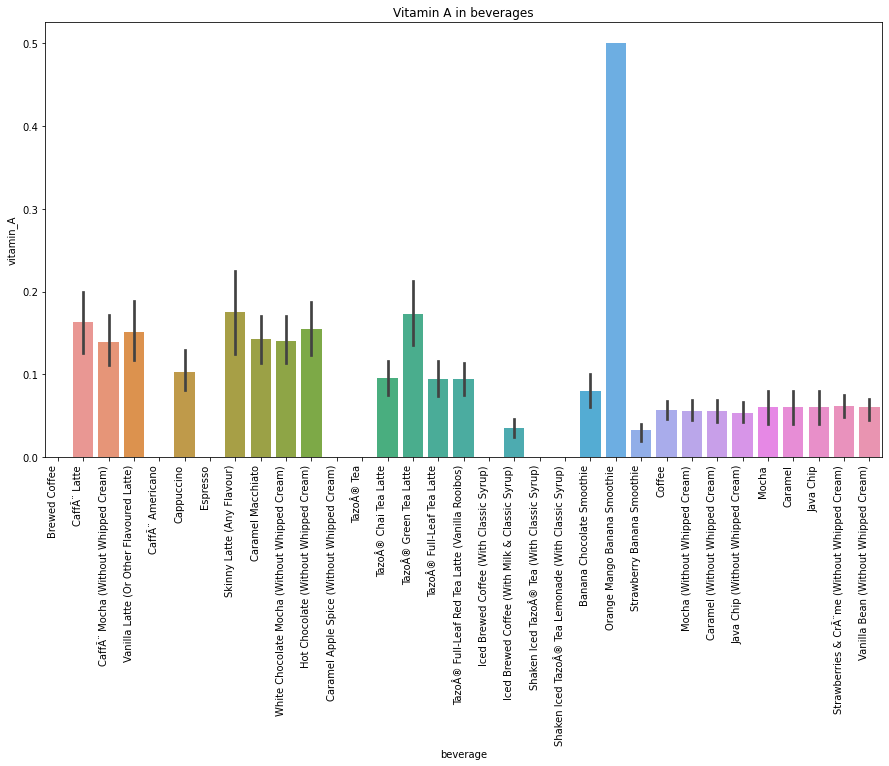

In [157]:
plt.figure(figsize=(15, 8))
sns.barplot(data=req_data, x="beverage", y="vitamin_A")
plt.xticks(rotation=90, ha='right')
plt.title("Vitamin A in beverages")

Orange Mango Banana smoothie has highest vitamin A.

Vitamin c in beverages

Text(0.5, 1.0, 'Vitamin C in beverages')

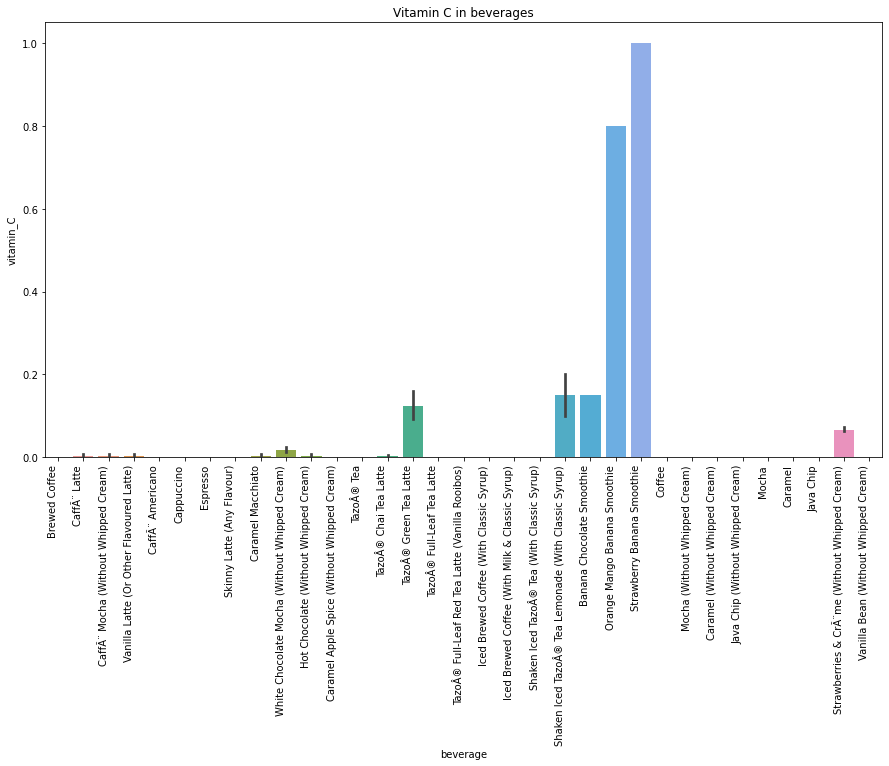

In [165]:
plt.figure(figsize=(15, 8))
sns.barplot(data=req_data, x="beverage", y="vitamin_C")
plt.xticks(rotation=90, ha='right')
plt.title("Vitamin C in beverages")

Strawberry Banana smothie and Orange Mango Banana smootie have highest vitamin C.

Protien in beverages

Text(0.5, 1.0, 'protien in beverages')

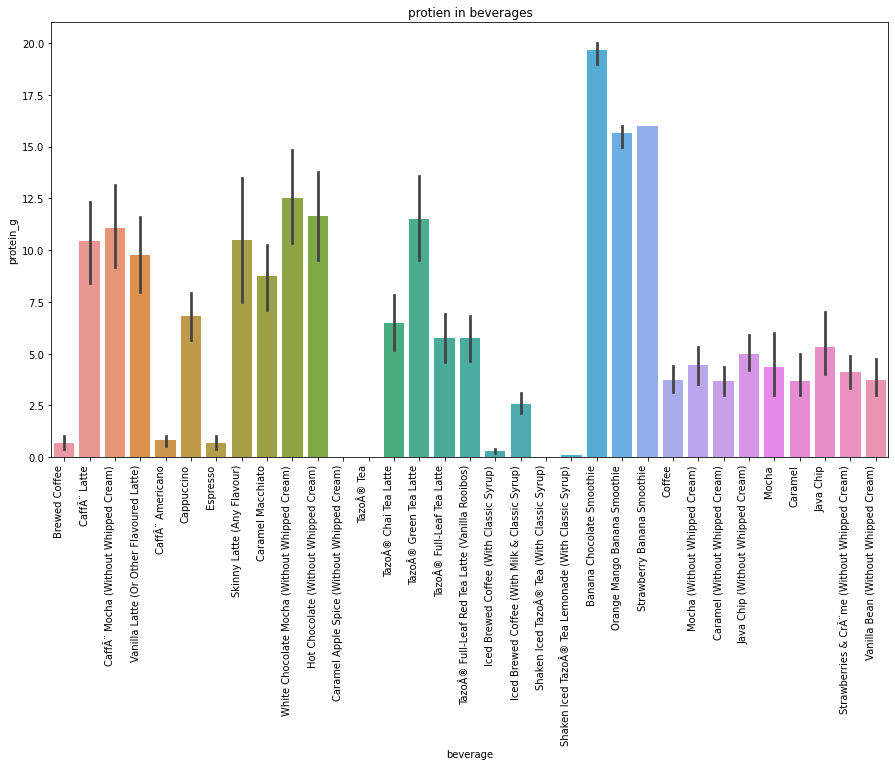

In [170]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data, x="beverage", y="protein_g")
plt.xticks(rotation=90, ha='right')
plt.title("protien in beverages")

Banana Chocolate smootie is a protien rich beverage.

Hence, we can conclude that most of the fruit based beverages are healthy and rich in protien, vitamins. While some bevrage like White chocolate mocha and java chip are very healthy as they contain more carbohydrates in ratio with calories.